# Analyzing the Popularity of Different Programming Languages over Time #

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/marin/OneDrive/Python/Udemy/QueryResults.csv', names=['Date','Tag', 'Posts'], header=0)
# The top 5 rows, last 5 rows
print(df.head())
print(df.tail())
df.shape #Nb or rows of the dataframe & columns

                  Date         Tag  Posts
0  2008-07-01 00:00:00          c#      3
1  2008-08-01 00:00:00    assembly      8
2  2008-08-01 00:00:00  javascript    162
3  2008-08-01 00:00:00           c     85
4  2008-08-01 00:00:00      python    124
                     Date    Tag  Posts
1986  2020-07-01 00:00:00      r   5694
1987  2020-07-01 00:00:00     go    743
1988  2020-07-01 00:00:00   ruby    775
1989  2020-07-01 00:00:00   perl    182
1990  2020-07-01 00:00:00  swift   3607


(1991, 3)

**There are 1991 rows and 3 colums in the dataframe** 

In [152]:
# Nb of entries in each column non nulls
df.count()

Date     1991
Tag      1991
Posts    1991
dtype: int64

**Each row is filled. There aren't null values. Compared to the number of rows in the df.shape(), we can see that each column has 1991 values non nulls. So, no null values**

**Question1:** How many posts are there per language. Which programming language had the most posts since the creation of Stach Overflow?

In [153]:
# Counting the Nb of posts per languae
posts_per_language = df.groupby('Tag').sum()
ordered_posts = posts_per_language.sort_values('Posts', ascending = False)
ordered_posts

,Date,Posts
Tag,,
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2056510
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1696403
python,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1496210
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1423530
php,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1361988
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,684210
r,2008-09-01 00:00:002008-11-01 00:00:002008-12-...,356799
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,336042
swift,2009-01-01 00:00:002009-02-01 00:00:002009-03-...,273055


In [154]:
posts_per_language.loc[posts_per_language['Posts'].idxmax()]

Date     2008-08-01 00:00:002008-09-01 00:00:002008-10-...
Posts                                              2056510
Name: javascript, dtype: object

**Answer1:** Find above the sum or the number of posts per language. The language with the highest number of posts is javascript

**Question2:** How many months of posts exist for each programming language

In [155]:
months_of_posts = df.groupby('Tag').count()
months_of_posts.sort_values('Date', ascending = False)
months_of_posts

,Date,Posts
Tag,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


**Answer2:** The Assembly has the highest frequency of presence over time. Assembly had 144 months of activity during the 2008-2020.

**Selecting an individual cell**

In [156]:
# Selecting the 2nd date
# With the brackets on the column
print(df['Date'][1])
# Without them
df.Date[1]

2008-08-01 00:00:00


'2008-08-01 00:00:00'

**Cleaning the data**

Let's change the format from a string of '2008-08-01 00:00:00' to a datetime. Checking the type of a value.

In [157]:
#Converting 1 value to datetime by the pd.to_datetime()
pd.to_datetime(df.Date[1])
#We check the type of this value
type(pd.to_datetime(df.Date[1]))

pandas._libs.tslibs.timestamps.Timestamp

In [158]:
# Converting the entire column
df.Date = pd.to_datetime(df.Date)
df.head()

,Date,Tag,Posts
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


In [159]:
df.Date

0      2008-07-01
1      2008-08-01
2      2008-08-01
3      2008-08-01
4      2008-08-01
          ...    
1986   2020-07-01
1987   2020-07-01
1988   2020-07-01
1989   2020-07-01
1990   2020-07-01
Name: Date, Length: 1991, dtype: datetime64[ns]

**Pivoting**

Let's pivote the DataFrame so that each row is a date and each column is a programming language?

In [160]:
reshaped_df = df.pivot(index = 'Date',columns='Tag',values='Posts')
reshaped_df

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


In [161]:
reshaped_df.shape

(145, 14)

Now the new dataframe has 145 rows and 14 columns

In [162]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='Tag')

In [163]:
#Counting the number of entries per language shows that not all the languages are the same. The count() function excludes the NaN values. 
#When we pivoted, the NaN were inserted when there were no posts for a language in that month.
reshaped_df.count()

Tag
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

**Dealing with NaN**

We don't want to drop the rows that contain NaN, we want to substitute them with the  **.fill.na(substitution, inplace=True)**

In [164]:
# Filling the NaN values by 0
reshaped_df.fillna(0,inplace=True)
reshaped_df

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


Are you sure that there are any other NaN values left in the dataframe? Let's check

In [165]:
reshaped_df.isna().values.any()

False

# Data Visualisation #

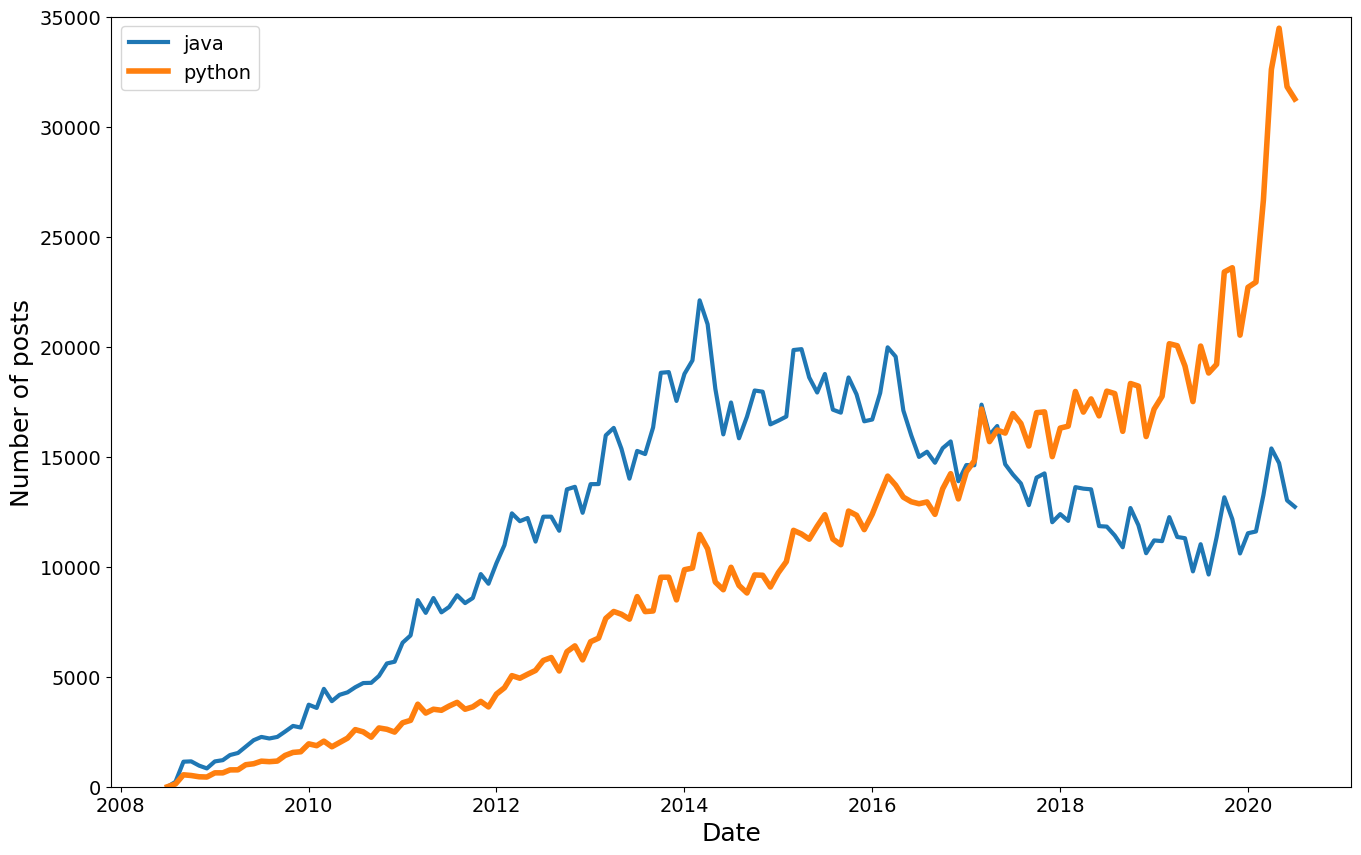

In [223]:
#Plotting the popularity of the Java vs Python programming language

#Setting the size of the figure
plt.figure(figsize=(16,10))  #width,height

#Setting the fontsize of the axis X & Y
plt.xticks(fontsize=14) #Fontsize axis X
plt.yticks(fontsize=14) #Fontsize axis Y

#Naming the axis+fontsize of the labels
plt.xlabel('Date',fontsize=18)
plt.ylabel('Number of posts',fontsize=18)

#Setting a upper and under limit
plt.ylim(0,35000)

#Plotting two programming languages & creating a legend
plt.plot(reshaped_df.index,reshaped_df['java'],linewidth=3,label=reshaped_df['java'].name) #plotting java
plt.plot(reshaped_df.index,reshaped_df['python'],linewidth=4,label=reshaped_df['python'].name) #plotting python

plt.legend(fontsize=14)

We can observe the evolution between these two programming languages over time. From 2008 until 2017 the number of Java posts was higher than Python. Approximately in 2017, the number of posts of Python starts to increase and culminate in 2020, surpasing Java by a wide margin.

**Plotting all the programming languages in the same plot**

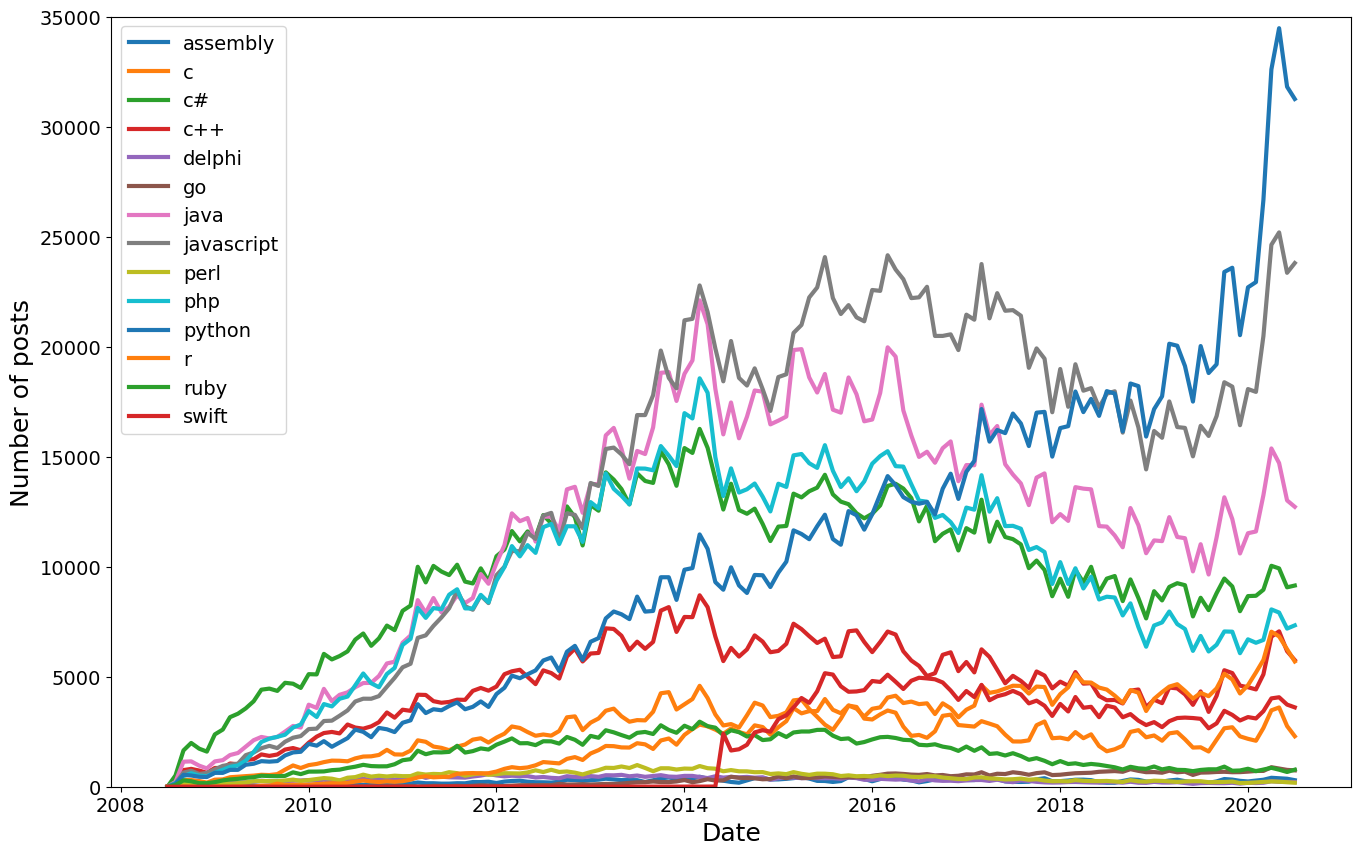

In [227]:
#Setting the size of the figure
plt.figure(figsize=(16,10))  #width,height

#Setting the fontsize of the axis X & Y
plt.xticks(fontsize=14) #Fontsize axis X
plt.yticks(fontsize=14) #Fontsize axis Y

#Naming the axis+fontsize of the labels
plt.xlabel('Date',fontsize=18)
plt.ylabel('Number of posts',fontsize=18)

#Setting a upper and under limit
plt.ylim(0,35000)

#Plotting all languages using FOR LOOP
for column in reshaped_df:
    plt.plot(reshaped_df.index,reshaped_df[column],
            linewidth=3,label=reshaped_df[column].name)

#Adding a legend
plt.legend(fontsize=14)

**Using the rolling mean for the noisy time series charts**
The data can fluctuate wildly, noisy data.It is hard to see if there is a real trend(whether is rising or falling). To clarify the trend, we can use the moving average = rolling mean

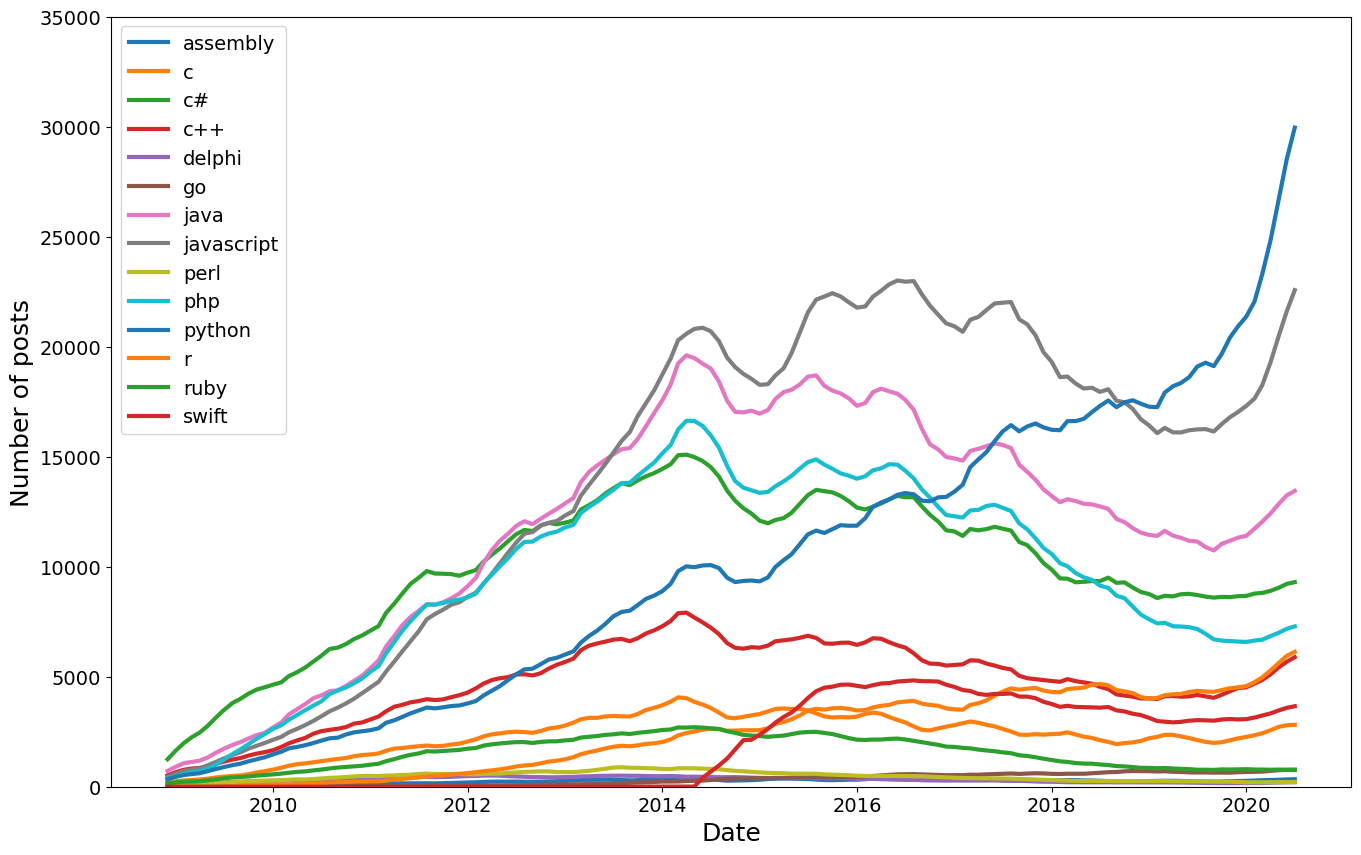

In [232]:
#Creating the rolling mean
roll_df = reshaped_df.rolling(window=6).mean()


#Setting the size of the figure
plt.figure(figsize=(16,10))  #width,height

#Setting the fontsize of the axis X & Y
plt.xticks(fontsize=14) #Fontsize axis X
plt.yticks(fontsize=14) #Fontsize axis Y

#Naming the axis+fontsize of the labels
plt.xlabel('Date',fontsize=18)
plt.ylabel('Number of posts',fontsize=18)

#Setting a upper and under limit
plt.ylim(0,35000)

#Plotting all languages using FOR LOOP - USING the Rolling mean
for column in roll_df.columns:
    plt.plot(roll_df.index,roll_df[column],
            linewidth=3,label=roll_df[column].name)

#Adding a legend
plt.legend(fontsize=14)

**According to the line chart, answer the following questions**

**Question3:** What was the most popular programming language between 2008 and 2012?

c#

**Question4:** What was the most popular programming language between 2008 and 2012?

javascript

**Question5:** What was the most popular programming language in 2020?

python